In [5]:
import xarray
from distributed import Client
import numpy as np
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import regionmask


client = Client('localhost:8786')
client

<Client: 'tcp://146.6.192.149:8786' processes=10 threads=10>

In [3]:
HW_DIR = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/HEAT_OUTPUTS/"

land_mask_path = "/projects/dgs/persad_research/SIMULATION_DATA/DATA/LENS1/CESM1/all/001/day/LANDFRAC/b.e11.B1850C5CN.f09_g16.005.cam.h0.LANDFRAC.200001-209912.nc"
land_mask = xarray.open_dataset(land_mask_path)["LANDFRAC"].mean(dim="time")

hw_mn_all_path = f"{HW_DIR}CESM1_LE_all_TREFHTMN_HW_METRICS.zarr"
hw_mn_xaer_path = f"{HW_DIR}CESM1_LE_xaer_TREFHTMN_HW_METRICS.zarr"
hw_mn_xghg_path = f"{HW_DIR}CESM1_LE_xghg_TREFHTMN_HW_METRICS.zarr"
OUTPUT_DIR = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/MERRA2/HEAT_OUTPUTS/"
hw_mn_merra_path = f"{OUTPUT_DIR}MERRA2_T2MMIN_HW_METRICS.zarr"


hw_mn_all = xarray.open_zarr(hw_mn_all_path)
hw_mn_xaer = xarray.open_zarr(hw_mn_xaer_path)
hw_mn_xghg = xarray.open_zarr(hw_mn_xghg_path)
hw_mn_merra = xarray.open_zarr(hw_mn_merra_path)


hw_mn_all_mts = hw_mn_all.sel(percentile=0.9).where(land_mask > 0).compute()
hw_mn_xaer_mts = hw_mn_xaer.sel(percentile=0.9).where(land_mask > 0).compute()
hw_mn_xghg_mts = hw_mn_xghg.sel(percentile=0.9).where(land_mask > 0).compute()
hw_mn_merra_mts = hw_mn_merra.sel(percentile=0.9).where(land_mask > 0).compute()

Text(0.5, 0.98, '(2.A) LENS1, Ensemble Mean, ALL-Forcing Heatwave Frequency')

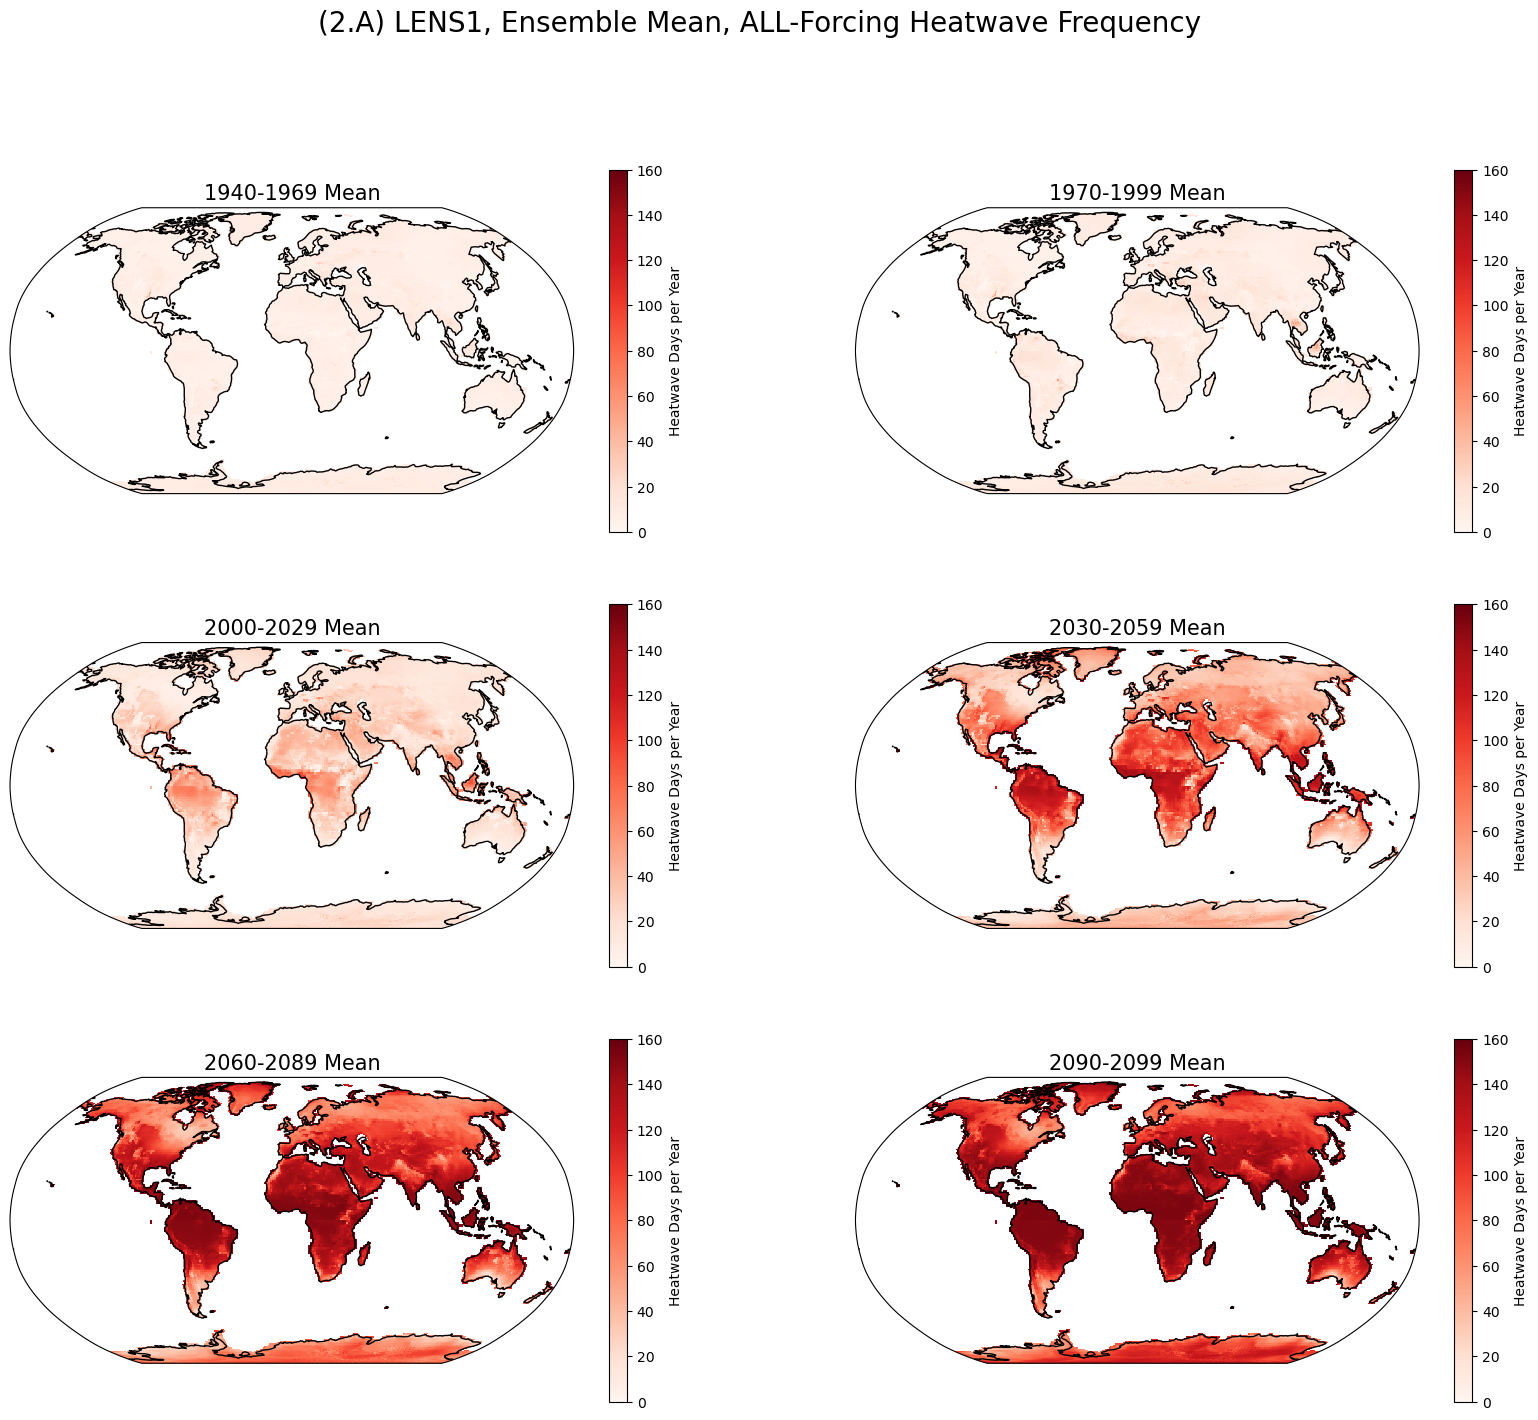

In [38]:
proj = ccrs.Robinson()
transform = ccrs.PlateCarree()
f, axes = plt.subplots(3, 2, figsize=(20, 16), facecolor='w', subplot_kw=dict(projection=proj))

ranges = [[(1940, 1969), (1970, 1999)], [(2000, 2029), (2030, 2059)], [(2060, 2089), (2090, 2099)]]

for i, axi in enumerate(axes):
    for j, ax in enumerate(axi):
        start, end = ranges[i][j]
        ds = hw_mn_all_mts["HWF"].sel(year=slice(start, end)).mean(dim=["year", "member"])
        ds = ds.rename("Heatwave Days per Year")
        ds.plot(ax=ax, transform=transform, cmap="Reds", vmax=160, vmin=0)
        ax.coastlines()
        ax.set_title(f"{start}-{end} Mean", fontsize=15)

f.suptitle("(2.A) LENS1, Ensemble Mean, ALL-Forcing Heatwave Frequency", fontsize=20)

Text(0.5, 0.98, '(2.B) LENS1, Ensemble Mean, AER Change in Heatwave Frequency')

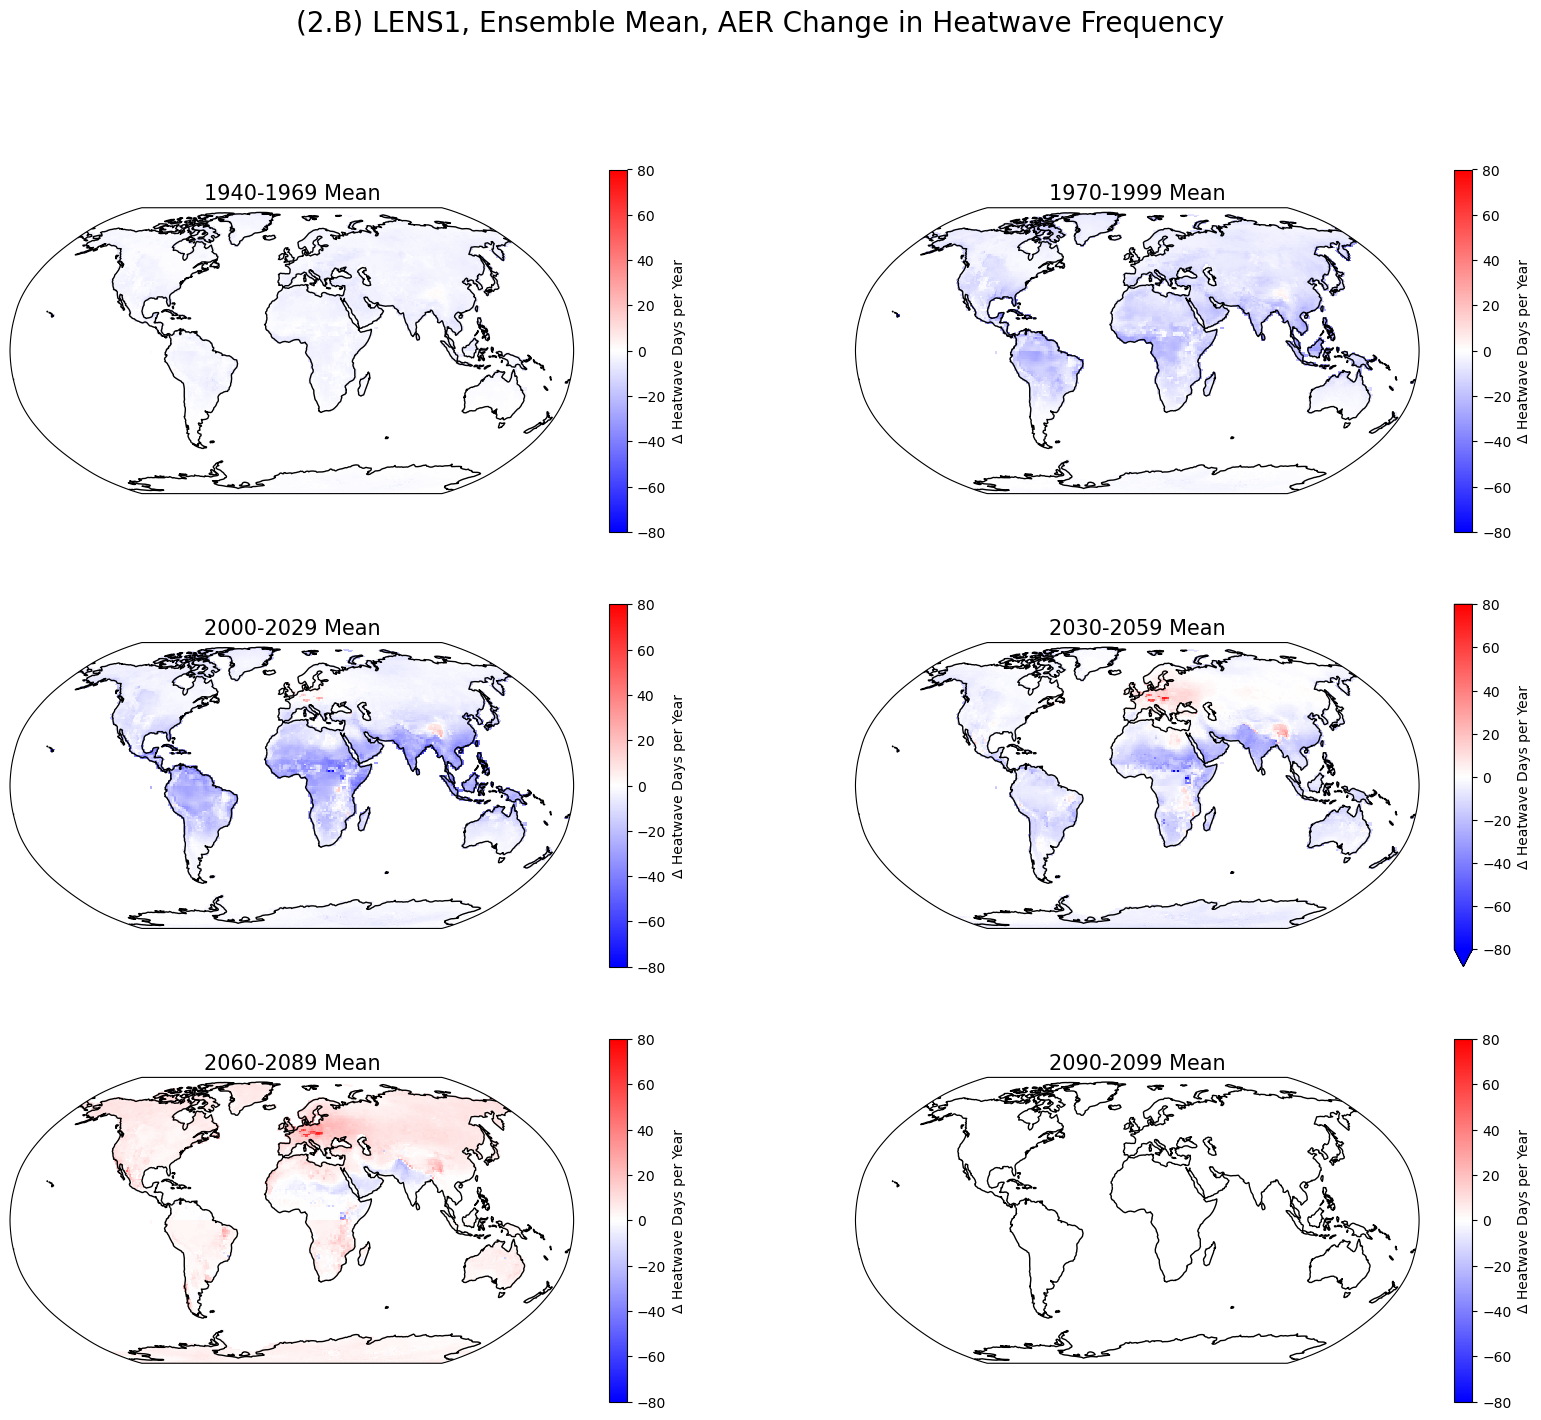

In [43]:
proj = ccrs.Robinson()
transform = ccrs.PlateCarree()
f, axes = plt.subplots(3, 2, figsize=(20, 16), facecolor='w', subplot_kw=dict(projection=proj))

ranges = [[(1940, 1969), (1970, 1999)], [(2000, 2029), (2030, 2059)], [(2060, 2089), (2090, 2099)]]

for i, axi in enumerate(axes):
    for j, ax in enumerate(axi):
        start, end = ranges[i][j]
        ds = hw_mn_all_mts["HWF"].sel(year=slice(start, end)).mean(dim=["year", "member"])
        ds -= hw_mn_xaer_mts["HWF"].sel(year=slice(start, end)).mean(dim=["year", "member"])
        ds = ds.rename("Δ Heatwave Days per Year")
        ds.plot(ax=ax, transform=transform, cmap="bwr", vmin=-80, vmax=80)
        ax.coastlines()
        ax.set_title(f"{start}-{end} Mean", fontsize=15)

f.suptitle("(2.B) LENS1, Ensemble Mean, AER Change in Heatwave Frequency", fontsize=20)

Text(0.5, 0.98, '(2.C) LENS1, Ensemble Mean, GHG Change in Heatwave Frequency')

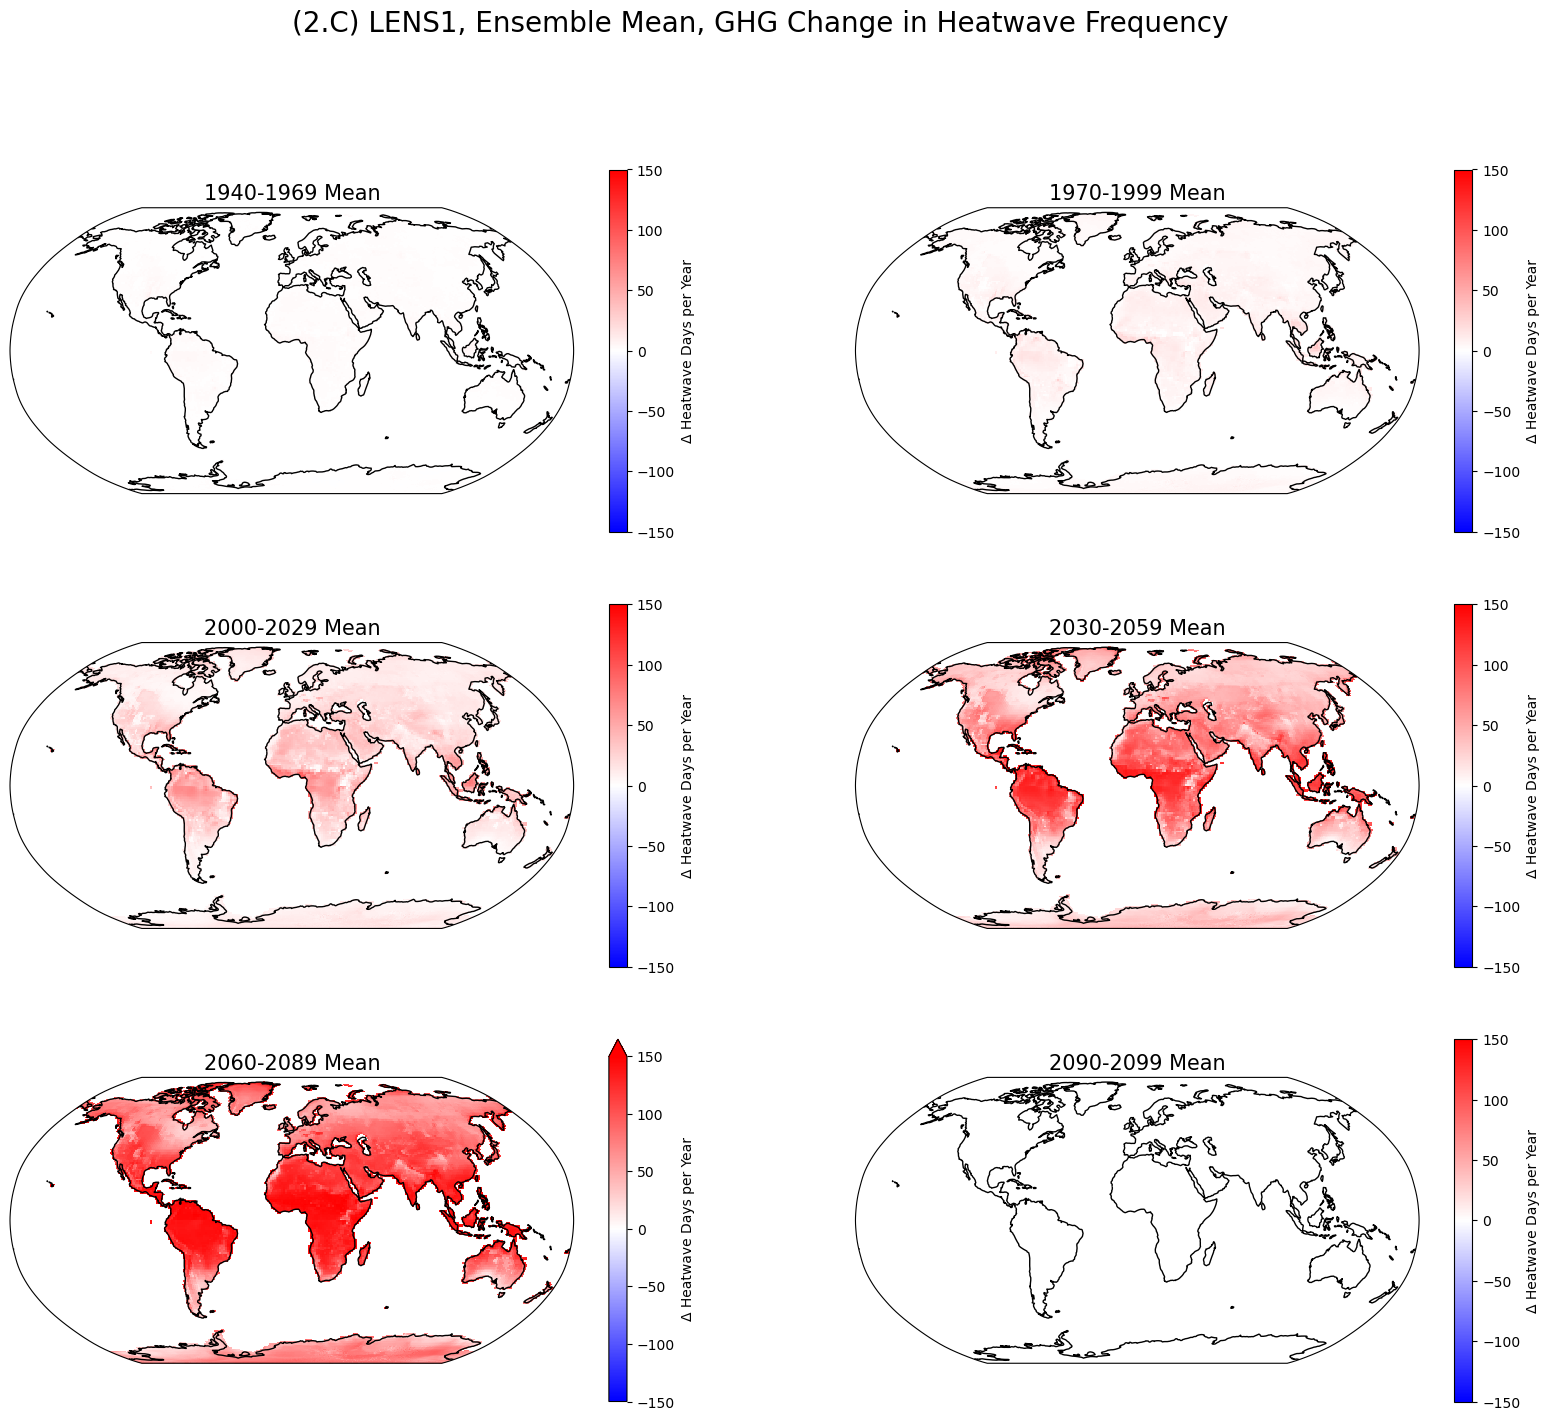

In [45]:
proj = ccrs.Robinson()
transform = ccrs.PlateCarree()
f, axes = plt.subplots(3, 2, figsize=(20, 16), facecolor='w', subplot_kw=dict(projection=proj))

ranges = [[(1940, 1969), (1970, 1999)], [(2000, 2029), (2030, 2059)], [(2060, 2089), (2090, 2099)]]

for i, axi in enumerate(axes):
    for j, ax in enumerate(axi):
        start, end = ranges[i][j]
        ds = hw_mn_all_mts["HWF"].sel(year=slice(start, end)).mean(dim=["year", "member"])
        ds -= hw_mn_xghg_mts["HWF"].sel(year=slice(start, end)).mean(dim=["year", "member"])
        ds = ds.rename("Δ Heatwave Days per Year")
        ds.plot(ax=ax, transform=transform, cmap="bwr", vmin=-150, vmax=150)
        ax.coastlines()
        ax.set_title(f"{start}-{end} Mean", fontsize=15)

f.suptitle("(2.C) LENS1, Ensemble Mean, GHG Change in Heatwave Frequency", fontsize=20)